In [395]:
import pandas as pd
import numpy as np
import warnings
from matplotlib import pyplot as plt
warnings.filterwarnings('ignore')

# Data Preprocessing

### Loading auto_mpg.csv and assigning it to a variable called auto

In [396]:
auto = pd.read_csv('auto_mpg.csv', sep=';')

In [397]:
auto.head(10)

mpg  cylinders  displacement  horsepower  weight  acceleration  \
0  18.0          8         307.0       130.0  3504.0          12.0   
1  15.0          8         350.0       165.0  3693.0          11.5   
2  18.0          8         318.0       150.0  3436.0          11.0   
3  16.0          8         304.0       150.0  3433.0          12.0   
4  17.0          8         302.0       140.0  3449.0          10.5   
5  15.0          8         429.0       198.0  4341.0          10.0   
6  14.0          8         454.0       220.0  4354.0           9.0   
7  14.0          8         440.0       215.0  4312.0           8.5   
8  14.0          8         455.0       225.0  4425.0          10.0   
9  15.0          8         390.0       190.0  3850.0           8.5   

   model_year  origin                   car_name  
0          70       1  chevrolet chevelle malibu  
1          70       1          buick skylark 320  
2          70       1         plymouth satellite  
3          70       1              amc rebel sst  
4          70       1                ford torino  
5          70       1           ford galaxie 500  
6          70       1           chevrolet impala  
7          70       1          plymouth fury iii  
8          70       1           pontiac catalina  
9          70       1         amc ambassador dpl

### Data Cleaning

1. We are going to check if there is any missing values
2. Before that we will be checking on some basic info about the data

In [398]:
auto.columns

Index(['mpg', 'cylinders', 'displacement', 'horsepower', 'weight',
       'acceleration', 'model_year', 'origin', 'car_name'],
      dtype='object')

In [371]:
auto.info

<bound method DataFrame.info of       mpg  cylinders  displacement  horsepower  weight  acceleration  \
0    18.0          8         307.0       130.0  3504.0          12.0   
1    15.0          8         350.0       165.0  3693.0          11.5   
2    18.0          8         318.0       150.0  3436.0          11.0   
3    16.0          8         304.0       150.0  3433.0          12.0   
4    17.0          8         302.0       140.0  3449.0          10.5   
..    ...        ...           ...         ...     ...           ...   
393  27.0          4         140.0        86.0  2790.0          15.6   
394  44.0          4          97.0        52.0  2130.0          24.6   
395  32.0          4         135.0        84.0  2295.0          11.6   
396  28.0          4         120.0        79.0  2625.0          18.6   
397  31.0          4         119.0        82.0  2720.0          19.4   

     model_year  origin                   car_name  
0            70       1  chevrolet chevelle malibu

3. The sum for all columns show 0, which means there are no missing values

In [399]:
auto.isna().sum()

mpg             0
cylinders       0
displacement    0
horsepower      0
weight          0
acceleration    0
model_year      0
origin          0
car_name        0
dtype: int64

### Data Visualization

4. We will perform some visualization to visualize the data
5. First we will compute the correlation matrix between the features with respect to the target

In [400]:
corr_auto = auto.corr()
corr_auto['mpg'].sort_values(ascending=True)

weight         -0.831741
displacement   -0.804203
horsepower     -0.777428
cylinders      -0.775396
acceleration    0.420289
origin          0.563450
model_year      0.579267
mpg             1.000000
Name: mpg, dtype: float64

6. Here we will plot the scatter matrix graph

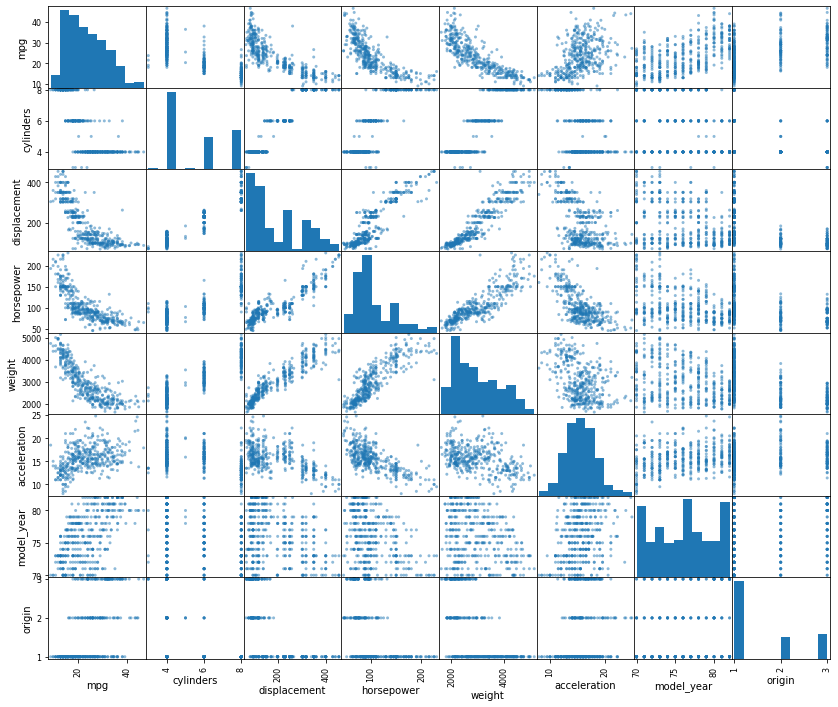

In [401]:
from matplotlib import pyplot as plt
from pandas.plotting import scatter_matrix
scatter_matrix(auto, figsize=(14,12))
plt.show()

Text(0.5, 1.0, 'Relationship between Origin and MPG')

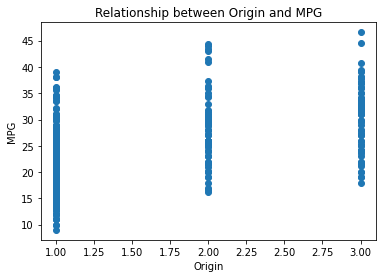

In [402]:
from matplotlib import pyplot as plt
plt.scatter(auto['origin'], auto['mpg'])
plt.xlabel('Origin')
plt.ylabel('MPG')
plt.title('Relationship between Origin and MPG')


7. With all these, graphs and results above we cannot make a conclusion on which feature is the best it is because the method above we used are statistical measures. These statistical measures will not give a optimal result for features with the mixture of discrete and continous data to solve a regression problem
8. However they might give us some insights on the data.
9. Moreover, we will be using different method to find the best features

### Preparation of Data

10. First we are going to separate the columns into X and y
- We are assigning the mpg column to y as its the target variable
- We are assigning the rest of the columns to X as they are going to be the features we will be using to predict
- But before we assigning the features we are droping the mpg, car_name and origin column as they are not contributing much in this context
- After doing the study on domain knowledge we decided to remove origin because car origin does not contribute in determining MPG value. This is because more technical data is needed in order to determine the car MPG. Moreover, there is no any clear description about origin stated in the data. 
- car_name feature is removed because it is a string value.

11. After we seggregate the feature columns, now we are going to normalize them to keep all the values within the range to make it easy for the models to perform predictions

In [403]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler
y = auto['mpg']
X = auto.drop(columns=['mpg', 'car_name', 'origin'])
scaler = StandardScaler()
X_norm = scaler.fit_transform(X)
X_norm = pd.DataFrame(X_norm)
X_norm.columns = X.columns

### Data Splitting

4. We are splitting the data here into train set and test set.
5. We are allocating 80% of the data for train set and 20% of it for test set

In [404]:
from sklearn.model_selection import train_test_split
seed_num = 10
X_train, X_test, y_train, y_test = train_test_split(X_norm, y, test_size=0.20, random_state=seed_num)

### Feature Selection

6. We are performing feature selection for 2,3,4,5 number of features using Sequential Forward Selection and Sequential Backward Selection
7. We are performing both forward selection and backward selection in order to determine which wrapper method is better.
8. We are performing sequential feature selector on different number of features(2,3,4,5) to find out the best number of features that can be used in the machine learning model

#### Sequential Forward Selection

In [407]:
best_features_forward = []
best_features_backward = []
feature_params = []

9. The SVM regression model we are using some descent parameters to run on which are
    - kernel = rbf --> Default
10. For each iteration, we will append the best feature subset that we have found to the best_feature_forward list

In [408]:
from sklearn.feature_selection import SequentialFeatureSelector
from sklearn.svm import SVR
for x in range(2,6):
    clf = SVR()
    sbs = SequentialFeatureSelector(clf, n_features_to_select = x, direction='forward', scoring='r2', cv=6)
    sbs.fit(X_train, y_train)
    best_feature = list(X.columns[sbs.get_support()])
    best_features_forward.append(best_feature)


In [409]:
best_features_forward

[['weight', 'model_year'],
 ['horsepower', 'weight', 'model_year'],
 ['displacement', 'horsepower', 'weight', 'model_year'],
 ['cylinders', 'displacement', 'horsepower', 'weight', 'model_year']]

#### Sequential Backward Selection

11. The SVM regression model we are using some descent parameters to run on which are
    - kernel = rbf --> Default
12. For each iteration, we will append the best feature subset that we have found in the best_feature_backward list

In [410]:
for x in range(2,6):
    clf = SVR()
    sbs = SequentialFeatureSelector(clf, n_features_to_select = x, direction='backward', scoring='r2', cv=6)
    sbs.fit(X_train, y_train)
    best_feature = list(X.columns[sbs.get_support()])
    best_features_backward.append(best_feature)

13. Now we create a new dictionary called best_feature_all to store the list of best feature subset for both forward and backward selection
14. We will use this dictionary to create a Pandas DataFrame, to visualize the features clearer

In [411]:
best_features_all ={"features": [2,3,4,5], "best_forward": best_features_forward, "best_backward": best_features_backward}

15. After performing both forward selection and backward selection, we concluded that both methods give the same solution.
16. The best subset of features chosen for both methods are the same
17. We are using the results from the forward selection for the rest of the procedure

In [412]:
best_features_all_pd = pd.DataFrame(best_features_all)
best_features_all_pd

features                                       best_forward  \
0         2                               [weight, model_year]   
1         3                   [horsepower, weight, model_year]   
2         4     [displacement, horsepower, weight, model_year]   
3         5  [cylinders, displacement, horsepower, weight, ...   

                                       best_backward  
0                               [weight, model_year]  
1                   [horsepower, weight, model_year]  
2     [displacement, horsepower, weight, model_year]  
3  [cylinders, displacement, horsepower, weight, ...

## Training and Evaluating the Model

### Training the model

18. Here we are going to train the model with some loose parameter and best feature subsets to see how it perform before headover to the hyperparameter tuning

In [413]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, max_error
score_eva = []
best_score_eva = 0
for x in range(4):
    model_svr = SVR(kernel='linear', C=2)
    model_svr.get_params
    model_svr.fit(X_train[best_features_forward[x]], y_train)
    y_pred = model_svr.predict(X_test[best_features_forward[x]])
    print("Model with "+ str(x+2) + " best features")
    print("Mean absolute error: ", mean_absolute_error(y_test, y_pred))
    print("Mean squared error: ", mean_squared_error(y_test, y_pred))
    print("Maximum error: ", max_error(y_test, y_pred))
    r2_score_eva = r2_score(y_test, y_pred)
    print("R2 score: ", r2_score(y_test, y_pred),'\n')
    if r2_score_eva > best_score_eva:
        best_score_eva = r2_score_eva
    score_eva.append(r2_score_eva)

Model with 2 best features
Mean absolute error:  2.806275747294405
Mean squared error:  13.03698211909196
Maximum error:  11.342806796902131
R2 score:  0.7868206613983374 

Model with 3 best features
Mean absolute error:  2.8365053460819425
Mean squared error:  13.252651382798438
Maximum error:  11.092102044057953
R2 score:  0.7832940606426053 

Model with 4 best features
Mean absolute error:  2.8370522778307645
Mean squared error:  13.132232736026276
Maximum error:  11.30147227441796
R2 score:  0.7852631334878157 

Model with 5 best features
Mean absolute error:  2.8241893552251085
Mean squared error:  13.055346214776424
Maximum error:  11.440848460562712
R2 score:  0.7865203736679202 



### Evaluating the model with best feature subset

Text(0, 0.5, 'R2 score')

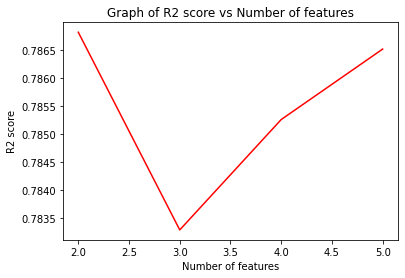

In [414]:
X_features = [2,3,4,5]
plt.plot(X_features, score_eva, 'r')
plt.title("Graph of R2 score vs Number of features")
plt.xlabel("Number of features")
plt.ylabel("R2 score")

19. Eventhough the model with 2 number of best features had performed well but still all the best feature subsets do not perform well. Hence we will perform hyparameter tuning with all the best feature subsets using a set of different parameters

## Choosing model hyperparameters

20. Next we are going to find the best parameters that our model can have along with the best features
21. We are going to run the grid search for a couple of different set of parameters, to see which hyperparameter works the best for its repective best feature subset
22. We will then collect all the results we get from the grid search and append it to a list called feature_params

In [415]:
from sklearn.model_selection import GridSearchCV

parameters = {'kernel': ('poly','rbf', 'linear'), 'C': [0.1, 1, 5], 'degree': [2,3,4]}

for x in range(2,6):
    clf = SVR()
    gsc = GridSearchCV(clf, parameters, cv=3, n_jobs=3, scoring=['neg_mean_absolute_error', 'neg_mean_squared_error', 'r2'], refit='r2', verbose=3, return_train_score=True)
    gsc.fit(X_train[best_features_forward[x-2]], y_train)
    gsc_csv_pd = pd.DataFrame(gsc.cv_results_)
    result = {'model_score': gsc.best_score_, 'model_hyperparameters': gsc.best_params_, 'best_features': best_features_forward[x-2]}
    print(gsc.best_score_)
    feature_params.append(result)
    

Fitting 3 folds for each of 27 candidates, totalling 81 fits
0.8641773625612759
Fitting 3 folds for each of 27 candidates, totalling 81 fits
0.8773968500341874
Fitting 3 folds for each of 27 candidates, totalling 81 fits
0.8760243308128395
Fitting 3 folds for each of 27 candidates, totalling 81 fits
0.8771948294004988


In [416]:
feature_params_pd = pd.DataFrame(feature_params)

23. After GridSearchCV has been performed, now we are going to determine which is the best parameter and best feature subsets by comparing its model training's score

model_score                   model_hyperparameters  \
0     0.864177  {'C': 5, 'degree': 2, 'kernel': 'rbf'}   
1     0.877397  {'C': 5, 'degree': 2, 'kernel': 'rbf'}   
2     0.876024  {'C': 5, 'degree': 2, 'kernel': 'rbf'}   
3     0.877195  {'C': 5, 'degree': 2, 'kernel': 'rbf'}   

                                       best_features  
0                               [weight, model_year]  
1                   [horsepower, weight, model_year]  
2     [displacement, horsepower, weight, model_year]  
3  [cylinders, displacement, horsepower, weight, ...

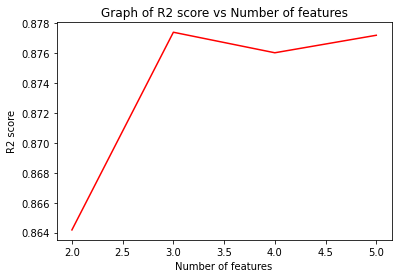

In [417]:
results_scores = []
max_score_index = 0
max_score = 0
i = 0
for x in feature_params:
    if x['model_score'] > max_score:
        max_score = x['model_score']
        max_score_index = i
    results_scores.append(x['model_score'])
    i = i + 1

X_features = [2,3,4,5]
plt.plot(X_features, results_scores, 'r')
plt.title("Graph of R2 score vs Number of features")
plt.xlabel("Number of features")
plt.ylabel("R2 score")
feature_params_pd

## Making Predictions

24. We will now create our final best model with best parameters and best feature subset

In [418]:
feature_params[max_score_index]

{'model_score': 0.8773968500341874,
 'model_hyperparameters': {'C': 5, 'degree': 2, 'kernel': 'rbf'},
 'best_features': ['horsepower', 'weight', 'model_year']}

In [419]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, max_error
model_svr_best = SVR(kernel=feature_params[max_score_index]['model_hyperparameters']['kernel'], C=feature_params[max_score_index]['model_hyperparameters']['C'], degree=feature_params[max_score_index]['model_hyperparameters']['degree'])
model_svr_best.get_params
model_svr_best.fit(X_train[feature_params[max_score_index]['best_features']], y_train)
y_pred = model_svr_best.predict(X_test[feature_params[max_score_index]['best_features']])
print("Mean absolute error: ", mean_absolute_error(y_test, y_pred))
print("Mean squared error: ", mean_squared_error(y_test, y_pred))
print("Maximum error made by the model: ", max_error(y_test, y_pred))
print("R2 score: ", r2_score(y_test, y_pred),'\n')

Mean absolute error:  2.3433986957104453
Mean squared error:  8.66455308692999
Maximum error made by the model:  8.900624883830886
R2 score:  0.8583181537354612 



25. The graph below was plotted to show how the predicted and test result fitted

Text(0.5, 1.0, 'Predicted MPG vs MPG')

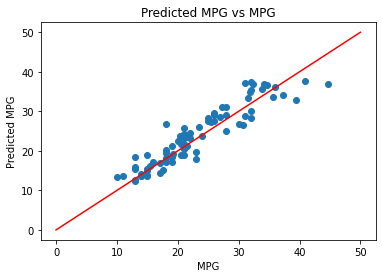

In [420]:
from matplotlib import pyplot as plt
plt.scatter(y_test,y_pred)
x = np.linspace(0, 50, 100)
y = x
plt.plot(x, y, 'r')
plt.xlabel("MPG")
plt.ylabel("Predicted MPG")
plt.title("Predicted MPG vs MPG")